<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## 3 Neural Networks in TensorFlow - Image Classification

### Introduction - Classify images of clothing

<font size="3">**This exercise trains a neural network model to classify images of clothing, like sneakers and shirts.**</font>
<font size="3">**It uses <span style="background-color: #ECECEC; color:#0047bb">tf.keras</span>, a high-level API to build and train models in TensorFlow.**</font>


### <font color='#34A853'>Import libraries</font>
<hr style="border:2px solid ##34A853"> </hr>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


### <font color='#34A853'>Import images from Fashion MNIST</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The classic MNIST dataset is often used as the "Hello, World" of machine learning programs for computer vision. [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.**</font>

<font size="3">**Fashion MNIST is a slightly more challenging problem than the classic MNIST. Instead of classifying the handwritten digits (0, 1, 2, etc.), it focuses on clothings.**</font>

<font size="3">**In the Fashion MNIST dataset, it contains 70,000 grayscale images in 10 categories.**</font>

<table align="left">
    <tr>
        <td><b>Label</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>0</td>
        <td>T-shirt/top</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Trouser</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pullover</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Dress</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Coat</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Sandal</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Shirt</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Sneaker</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Bag</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Ankle boot</td>
    </tr>
</table>

<font size="3">**Each example is a 28x28 grayscale image. Here's an example of how the data looks (each class takes three-rows).**</font>
<table align="left">
    <tr>
        <td><img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise1.png?alt=media&token=98376c1a-735a-402a-a11e-1b102ac2aef6" width="650"/></td>
        <td><img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.gif?alt=media&token=a935c255-c75a-467b-b280-39c24a411024" width="700"/></td>
    </tr>
</table>
<br>
<br>
<br>

Reference: https://github.com/zalandoresearch/fashion-mnist

<font size="3">**The Fashion MNIST data can be imported and loaded directly from TensorFlow.**</font>

<font size="3">**The dataset contains 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras.datasets.fashion_mnist.load_data()</span> returns four numpy arrays:**</font>

><font size="3">**<span style="color:#4285F4">train_images</span> is a numpy array of grayscale image data with shapes <span style="color:#4285F4">(60000, 28, 28)</span>, containing the training data.**</font>

><font size="3">**<span style="color:#4285F4">train_labels</span> is a numpy array of labels (integers in range 0-9) with shape <span style="color:#4285F4">(60000,)</span> for the training image.**</font>

><font size="3">**<span style="color:#4285F4">test_images</span> is a numpy array of grayscale image data with shapes <span style="color:#4285F4">(10000, 28, 28)</span>, containing the test data.**</font>

><font size="3">**<span style="color:#4285F4">test_labels</span> is a numpy array of labels (integers in range 0-9) with shape <span style="color:#4285F4">(10000,)</span> for the test image.**</font>

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<font size="3">**The images are stored in 28x28 numpy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. Their corresponding class names can be stored in a list.**</font>

In [3]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

### <font color='#34A853'>Explore the data</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Shapes of training and test images**</font>

In [4]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (60000, 28, 28)
The shape of training labels is: (60000,)


In [5]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 28, 28)
The shape of test labels is: (10000,)


<font size="3">**Label values**</font>

In [6]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


<font size="3">**Pixel values**</font>

The pixel values range from: 0 to 255


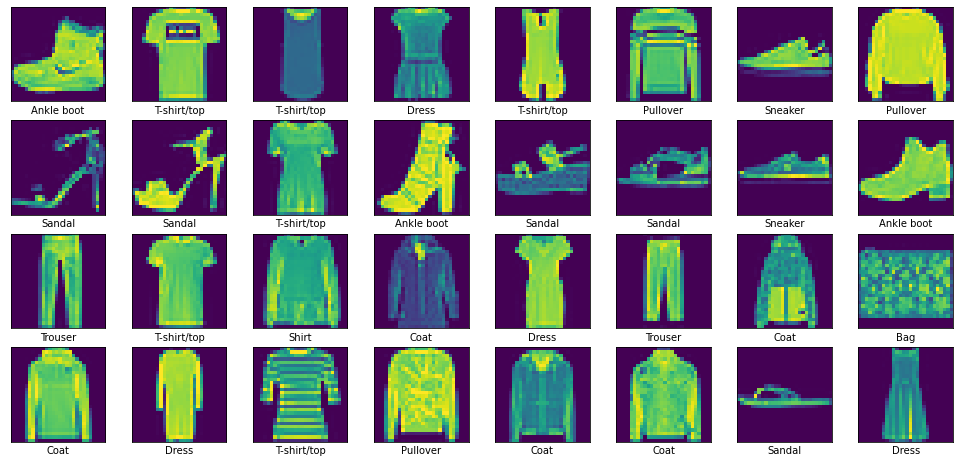

In [7]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Preprocess the data - Normalization</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font>
<font size="3">**Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows model to converge to better weights and, in turn, leads to a more accurate model.**</font>

<font size="3">**In practice, normalization refers to rescaling real-valued numeric attributes into a range of 0 to 1. Data will be normalized before feeding them to the neural network model.**</font>

<font size="3">**It's important that the <span style="color:#4285F4">training set</span> and <span style="color:#4285F4">testing set</span> be preprocessed in the same way. In this case, the pixel values of both training and test images are divided by 255.**</font>

In [8]:
train_images_normal = train_images / 255.0

test_images_normal = test_images / 255.0

The pixel values range from: 0.0 to 1.0


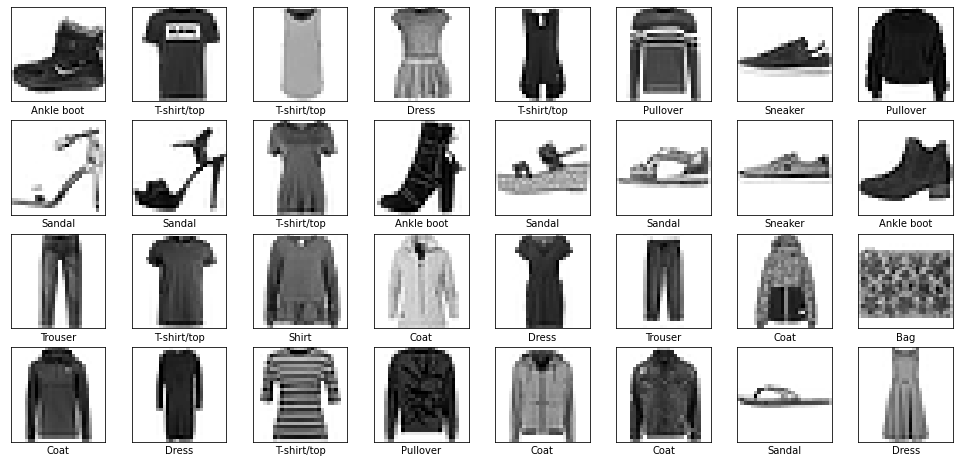

In [9]:
print("The pixel values range from:", np.min(train_images_normal ), "to" ,np.max(train_images_normal))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_normal[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Build the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Setup and configure a Sequential model*</font>

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<font size="3">**<span style="color:#4285F4">1<sup>st</sup></span> layer:**</font>
> <font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.Flatten</span> transforms the format of the images from a two-dimensional array (28 by 28 pixels) to a one-dimensional array (28x28 = 784 pixels).**</font>

> <font size="3">**This layer has no parameters to learn, which only serves to reformat the data by unstacking rows of pixels in the image and lining them up.**</font>

<font size="3">**<span style="color:#4285F4">2<sup>nd</sup></span> and <span style="color:#4285F4">3<sup>rd</sup></span> layers:**</font>
> <font size="3">**After the pixels are flattened, the network consists of a sequence of two <span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.Dense</span> layers. These layers are densely connected or fully connected.**</font>

> <font size="3">**The 2<sup>nd</sup> layer has 128 nodes (or neurons).**</font>

> <font size="3">**The 3<sup>rd</sup> layer has 10 nodes (or neurons) which returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.**</font> 

### <font color='Orange'>*2) Compile the model*</font>

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

<font size="3">**<span style="color:#4285F4">SparseCategoricalCrossentropy</span> and <span style="color:#4285F4">CategoricalCrossentropy</span> both compute categorical cross-entropy. The only difference is in how the targets/labels should be encoded.**</font>

> <font size="3">**For <span style="color:#4285F4">one hot</span> representation, <span style="color:#4285F4">CatergoricalCrossentropy</span> can be used.**</font>

> <font size="3">**For labels as integers (i.e. 0, 1, 2), <span style="color:#4285F4">SparseCategoricalCrossentropy</span> can be used.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">from_logits</span> argument informs the loss function whether the output is expected to be a logits tensor (i.e. normalized).**</font>

><font size="3">**By default, <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">False </span> which assumes that output encodes a probability distribution, such as outputs from softmax and sigmoid activations.**</font>

><font size="3">**If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, this assumes that output is a logits. In this case, softmax or sigmoid activations will automatically applied on the output values by the loss function. Hence, output layer doesn't need any probabilistic activation function.**</font>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, no activation function is needed in the output layer, e.g.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.png?alt=media&token=d053ce8a-8ccb-4087-a198-a19ced62e298" width="2000"/>

### <font color='#34A853'>Train the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Feed the model*</font>

In [13]:
model.fit(train_images_normal, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8914: 0s - loss: 0.2947 - accuracy: 0.89
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9075
Epoch 10/10
1875/1875 [=======================

<font size="3">**To start training, <span style="background-color: #ECECEC; color:#0047bb">model.fit()</span> method can be used to "fit" the model with training data. In this example, the training data is in the <span style="color:#4285F4">train_images_normal</span> and <span style="color:#4285F4">train_labels</span> arrays.**</font>

<font size="3">***Training accuracy***</font>
> <font size="3">**As the model trains, the loss and accuracy metrics are improving. After 10 epochs, this model reaches an accuracy of about 0.91 (91%) on training data.**</font><br>

### <font color='Orange'>*2) Evaluate the model*</font>

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 0s - loss: 56.6535 - accuracy: 0.8622
Test accuracy: 86 %


<font size="3">***Test accuracy***</font>
> <font size="3">**It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents <span style="color:#4285F4">overfitting</span>.**</font>

> <font size="3">**Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. In other words, its generalization ability is poor.**</font>
    
Reference:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### <font color='Orange'>*3) Make predictions*</font>

<font size="3">**Images can be fed into the trained network to make predictions.**</font>

In [15]:
predictions = model.predict(test_images_normal)

<font size="3">**A prediction is an array of 10 numbers. They represent the model's <span style="color:#4285F4">confidence</span> that the image corresponds to each of the 10 different articles of clothing. The highest confidence value indicates the prediction.**</font> 

<font size="3">**Let's take a look at the first prediction.**</font>

In [16]:
predictions[0]

array([7.3918903e-07, 4.9596856e-09, 2.2159139e-07, 1.3605209e-10,
       4.1828674e-09, 1.1968797e-03, 1.7712019e-07, 7.1608773e-03,
       2.9803684e-07, 9.9164081e-01], dtype=float32)

<font size="3">**The highest confidence is the last class in the array. Let's find out which class it belongs to.**</font>

In [17]:
max_confidence = np.argmax(predictions[0])

print("The highest confidence is:", max_confidence)
print("The predicted class is:", class_names[max_confidence])

The highest confidence is: 9
The predicted class is: Ankle boot


<font size="3">**The model is most confident that this image is an ankle boot. Let's examine the test label and see if it predicts correctly.**</font>

In [18]:
print("The test label is:", test_labels[0])
print("The test class is:", class_names[test_labels[0]])

The test label is: 9
The test class is: Ankle boot


<font size="3">**The model predicts correctly.**</font>

### <font color='Orange'>*4) Verify and visualize predictions*</font>

<font size="3">**With trained network, it can be used to make predictions.**</font>
<font size="3">**Let's predict 16 images. Correct prediction labels are blue and incorrect prediction labels are red. The number indicates the precentage (i.e. confidence) for the predicted label.**</font>

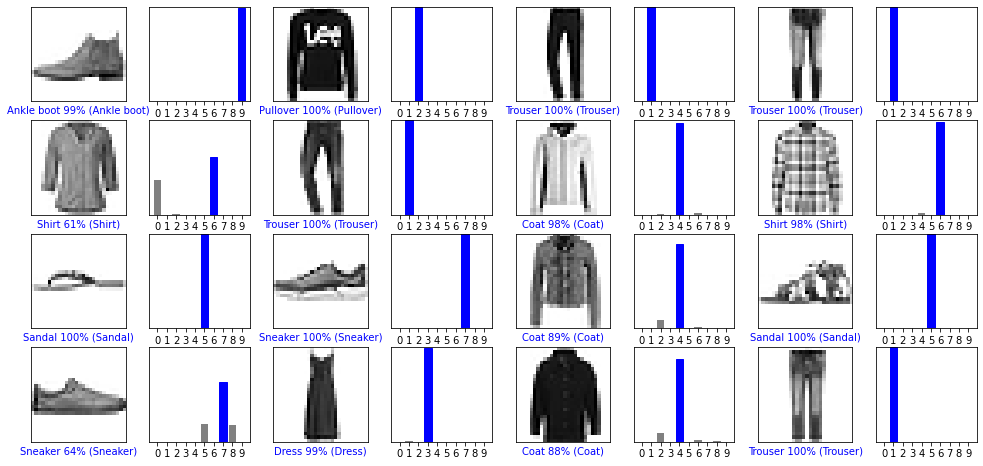

In [20]:
plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
    
plt.show()

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**The model can be wrong even when it has high confidence about its prediction.**</font>

### <font color='#34A853'>Use the trained model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Once the model is trained, images can be fed into the model for prediction.**</font>

In [21]:
# Grab an image from the test dataset.
img = test_images[50]
print(img.shape)

(28, 28)


<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras</span> models are optimized to make predictions on a <span style="color:#4285F4">batch</span>, or collection, of examples at once. Therefore, even this is a single image prediction, image needs to be add into a list and make it like a <span style="color:#4285F4">batch</span>.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">np.expand_dims</span> function can help insert a new axis that will appear at the axis position in the expanded array shape.**</font>

In [22]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


<font size="3">**Then, images can be fed into the model for prediction.**</font>

In [23]:
predictions_img = model.predict(img)

max_confidence = np.argmax(predictions_img[0])

print("The highest confidence is:", max_confidence)
print("The predicted class is:", class_names[max_confidence])

The highest confidence is: 4
The predicted class is: Coat


<font size="3">**Let's visualize the results.**</font>

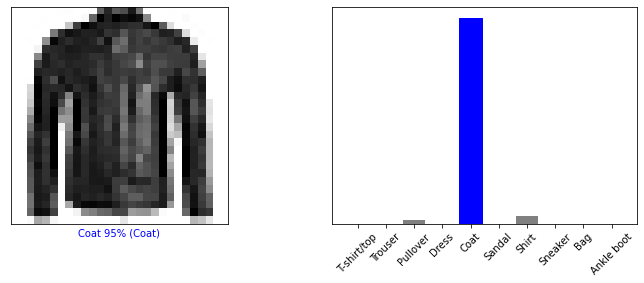

In [24]:
plt.figure(figsize=(12,4))

i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i]:
    color = 'blue'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                            100*np.max(predictions[i]),
                            class_names[test_labels[i]]),
                            color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="grey")
plt.ylim([0, 1])  

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('blue')
    
plt.show()

<font size="3">**The model predicts the label correctly.**</font>

<hr style="border:2px solid ##34A853"> </hr>

##### This exercise is revised based on the TensorFlow tutorial (Reference: https://www.tensorflow.org/tutorials/keras/classification).